# Python_Artificial_Neural_Network_Design_3

Created on Sat Nov 15 14:33:28 2018

@author: Charles Garrett Eason

Github Location: https://github.com/eason9/Python-JN-Demos.git

Main References:
* Dr. Hagan's Neural Network Design (buy it if you like it) - https://hagan.okstate.edu/NNDesign.pdf
* Dr. Amir Jafari (Send him money if you like him) - https://datasci.columbian.gwu.edu/amir-jafari
* Jafari's Github - https://github.com/amir-jafari

All photos are from Dr. Hagan's Neural Network Design.

## What are Artificial Neural Networks?

An artificial Neural Network (ANN) is a set of algorithms loosely modeled after the biological neuron designed to identify patterns in data.  Stated differently, an ANN can be defined as a "universal approximator", which learns to approximate any unknown function f(x) = y, given an appropriate framework, x, and y.  The "learning" of these networks can take on many forms (e.g. stochastic gradient descent), but is always defined by a numerical approximation (no analytical solutions are found).  Supervised (there's also unsupervised (clustering) and reinforced (graded / adversarial learning) ANNs) ANNs are very general and can be used in a wide array of problems: classification, fitting, prediction, clustering.

## Why use Python to Build and Run Neural Networks?

Because it is extremely easy with the availabe frameworks (we don't have to calculate the gradients!), e.g.
* Keras (Wrapper ontop of Tensorflow)
* PyTorch (Facebook)
* Tensorflow (Google)

## Types of ANNs

There are three main learning types that ANNs are classified under:
* Unsupervised Learning - (Very basic, used for PCA and clustering.)
* Supervised Learning - (Most common ANN, requires inputs and outputs to determine the funciton of interest.)
* Reinforcement Learning - (Most complex, like supervised learning but with extra components, e.g. adversarial components, graded training data as opposed to direct training data, etc.)

We will be focusing on supervised learning ANNs.

For supervissed ANNS there are three main types of network architecture (although there are many more):
* Multi-layer Perceptrons (MLP) - (Most simple, but can approximate a very general array of functions.)
* Convolutional Neural Networks (CNN) - (Used mainly for image data, but can be tricked to be used for other problems.)
* Recurrent Neural Networks (RNN) - (Used mainly for approximating functions with dynamic elements, e.g. time series.)

We will mostly focus on MLP as it is the typical introductory model that can be easily built upon (this architecture is analogous to OLS in that it is the first model most practitioners learn).

## Basic MLP Architecture
For the following discussion assume that the optimal weights are given.  In this case, the following networks will approximate some function in producing an output given some inputs.
### The Single-Input Neuron:
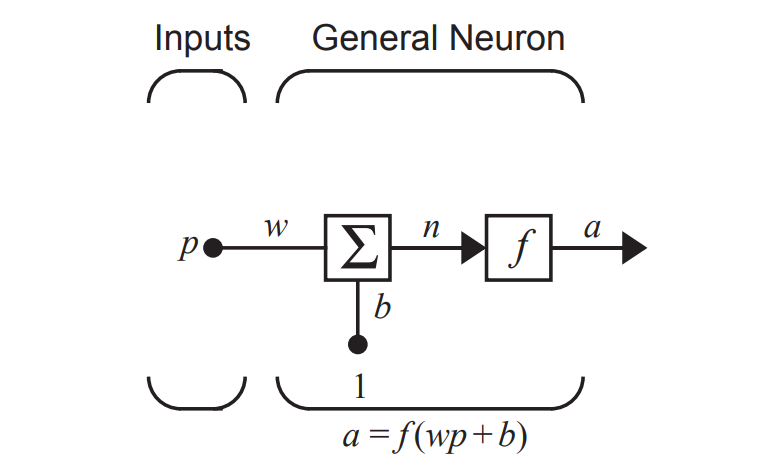

This is the most basic form of an ANN, a single neuron with a single input.  A single neuron is simply defined as a scalar input p being multiplied by a scalar weight w to form wp.  This is then sent to a summer and output as the net input n.  Finally a transfer function f is applied, resulting in the output a.  Notice that if the transfer function here is Purelin (y = x) , then we have a neumerical approach to OLS with a single input.


### Transfer Functions:
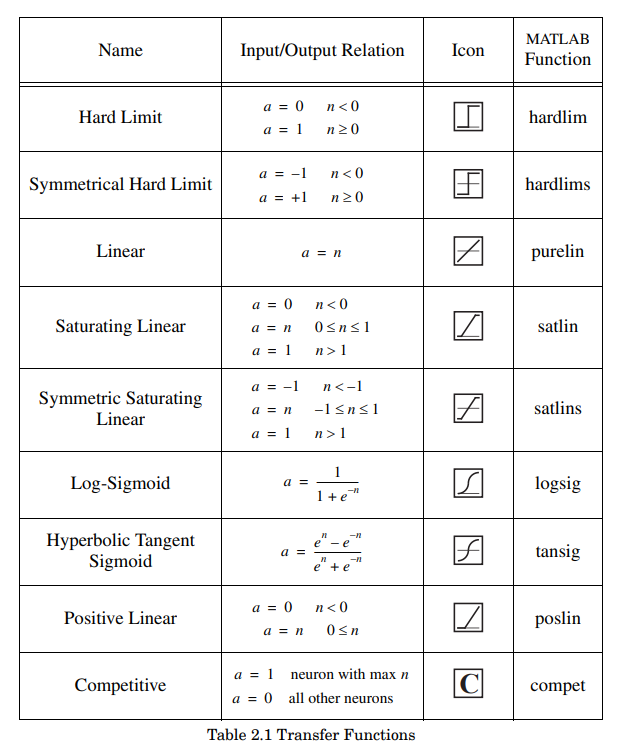

Notice the selection of the transfer funciton significantly alters the output of the neuron.  Transfer functions are the component that determines activation of the neuron and thus the types of functions the ANN can approximate.  For now notice that there are many options for transfer functions.

### Vector-Input Neuron
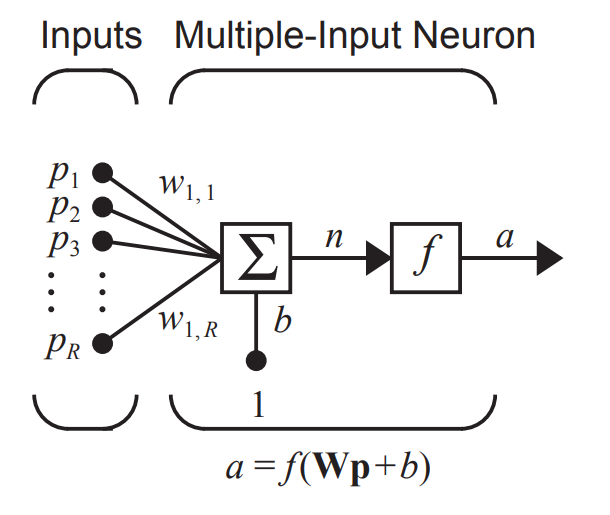

Typically, a neuron has more than one input (or it would be very boring).  Here we can see that instead of a single input, a vector can be given to the neural network.  This vector is then dotted with another weight vector to result in a similar outcome as the one input case; however, this network is mapping a multi-dimensional vector to a scalar output.  Notice that if the transfer function is Purelin, this network equates to numerically solving a multi-input OLS.

### Vector-Input Neuron Layer
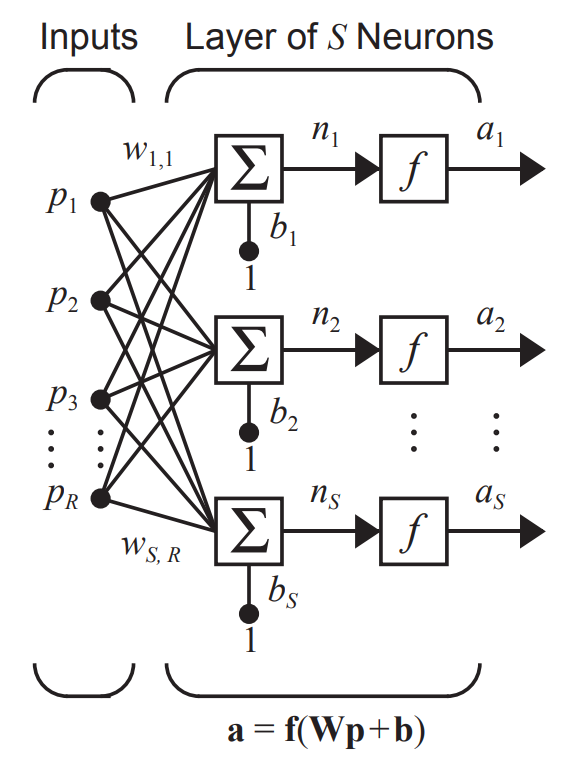
Further, neural networks typically have more than a single neuron to help the approxmate functions through an ensemble approach of different neurons being activated.  Here we have each element of our input vector being mapped onto each neuron in out single layer network.  Notice that if all the transfer functions are Purelin, this situation can be thought of an ensemble of different multiple variable OLS models all weighted to activate different groupings of OLS models given different inputs.  It should be clear here why ANN function approximations are non-linear (using multiple OLSs to approximate a funciton).  It should also be pointed out that neural networks have parameters (weights) that are trained, so they can be thought of as parametric models; however, because these parameters grown in size relative to the weights (as size(p)-> inf, size(W)-> inf), neural networks can also be thought of as non-parametric.  Thus, there is no consensus about ANNs being parametric or non-parametric models.

### Multiple Layers
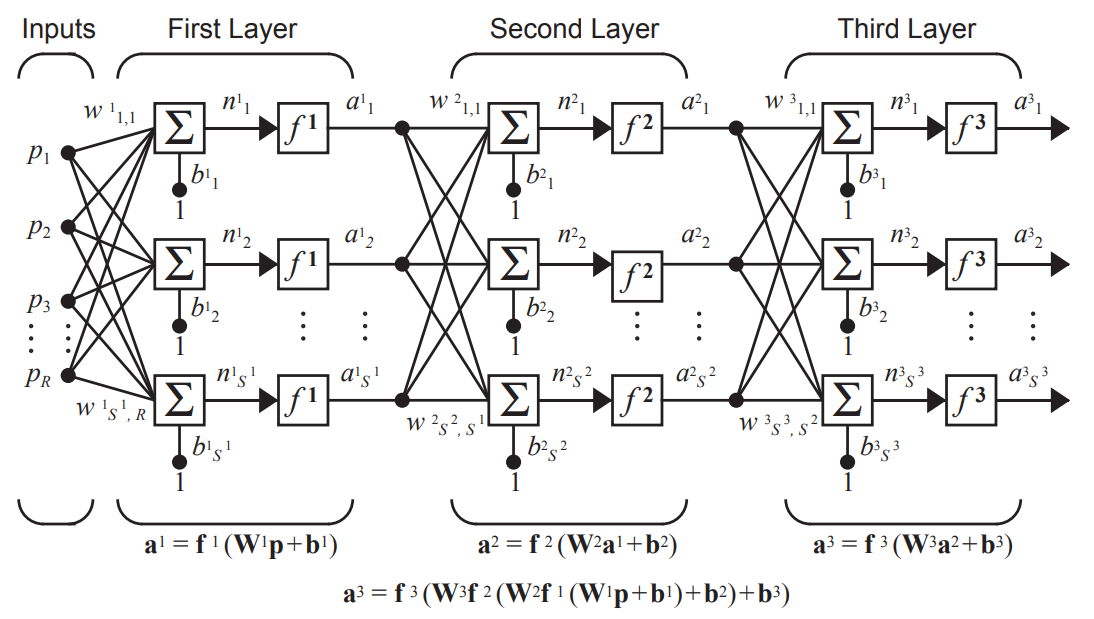
Continuing on to the logical conclusion, of course multiple layers can be included in a neural network.  Where the output of one can be fed into the output of another until the final output is obtained.  This network now can be thought of (assuming a Purelin transfer function) as our ensemble layer of OLSs feeding their output into another ensemble layer until the final output is given.

### Simplified Notation for a 3 Layer MLP
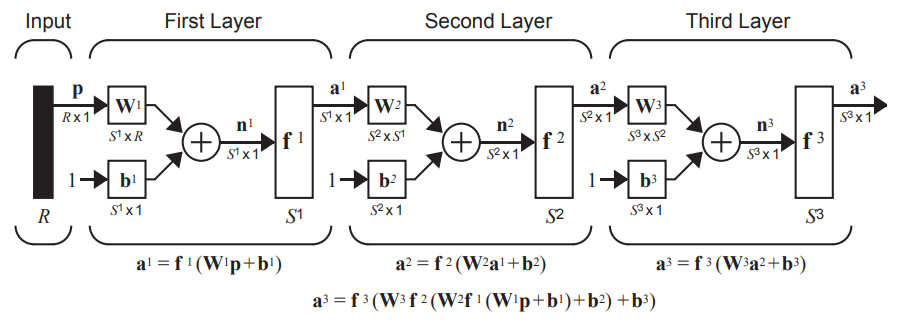
Finally, notice that each neuron is encapsulated in a weight matrix, W, and a bias vector, b, that is summed and input into the chosen transfer function.  This process is continued on until the output of the network is given.

### Many Types of ANNs (e.g. Recurrent)
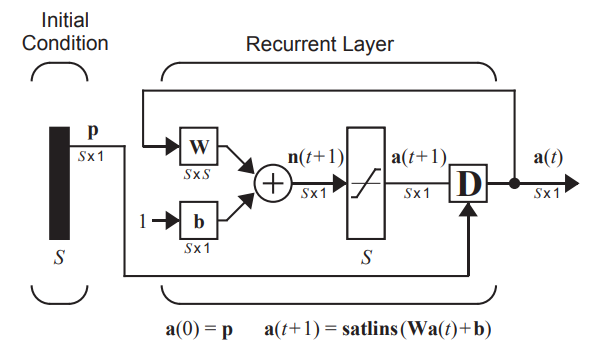
As can be seen ANNs come in many, many architectures.  So far we have only discussed MLPs, but here is an example of a Recurrent Neural Network (RNN).  This basic network is distinct form the MLP architecture because it has a delay, allowing for feedback into the model.

## A Unified Learning Rule for a Basic MLP
Until now we have briefly discussed the architecture of the MLP assuming the optimal weights are given; however, for the function to operate properly a learning rule to derive these weights must be defined.  Here we will discuss the Steepest Descent (SD) algorithm, but there are many learning rules (including non-gradient based ones, e.g. genetric algrithms).
### The Performance Index
Before we can begin numerically attempting to solve the problem, we need a performance index that we can minimixe.  This index will differ depending upon the type of problem being solved; however, for an MLP where we are attempting to approximate a function, Mean Squared Error (MSE) will do just fine.

Given the error defined as the difference of the given target, $t$, (or y in econometics terms) from the output of the network, $a$:

$$e = (t - a)$$

Our performance index will be defined by:

$$F(x) = E[e^Te] = E[(t - a)^T(t - a)]$$

And will be approximate with:

$$\hat{F(x)} = e^T(k)e(k) - (t(k) - a(k))^T(t(k) - a(k))$$

### Steepest Descent (SD) Algorithm

Now that we have out performance index we will need to define how we will minimize our function.  Ultimately, we want a function such that for each iteration:

$$\hat{F(x_{k+1})}<\hat{F(x_k)}$$

We can do this easily with a taylorseries expansion:

$$\hat{F(x_{k+1})} = \hat{F(x_{k}+{\Delta}x_{k})} \approx \hat{F(x_{k})} + g^T_k{\Delta}x_k$$

Where $g_k$ is the gradient evaluated at the old guess $x_k$:

$$g_k {\equiv} {\nabla}F(X)\Big|_{x=x_k}$$

Notice that for our performance index to decrease we need the second term of our taylor approximation to decrease:

$$g^T_k{\Delta}x_k = {\alpha}_kg^T_kp_k < 0$$

By selecting an alpha that is small but greater than zero:

$$g^T_kp_k < 0$$

Any $p_k$ that satisfies this equation is called a _descent direction_.  The funciton must go down if we take a small enough step in this direction.  The performance index will decrease most when $g^T_kp_k$ is most negative (assuming length of $p_k$ does not change).  This will be most negative when the direction vector is most negative when the direction vector is negative of the gradient.

$$p_k = -g_k$$

Hence, we end up at with the steepest decent algorithm:

$$x_{k+1} = x_k-{\alpha}_kg_k$$

Where $\alpha_k$ is the chosen learning rate (between zero and 1).  Note, some care must be taken when choosing this parameter.  Too large and SGD will not converge, too small and the convergence will take too long.  Note that convergance to the global minimum is not guarranteed, thus multiple runs with randomly initialized weights will be necessary.  Also note that the batch sizes will define if you are calculating pure stochastic SD (a weight update per input), a mini batch (a weight update per mini batch of inputs - average of the gradients), or the full gradient (a weight update per all inputs and averaged).
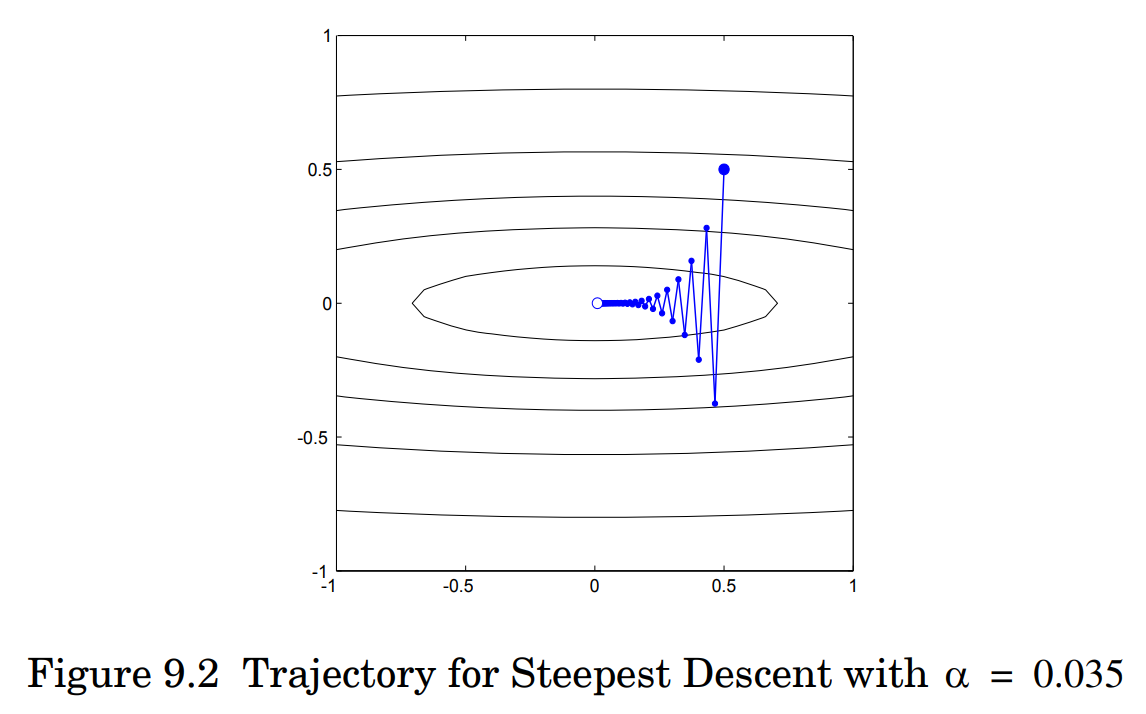

## Backpropagation
### Extracting the Sensitivities
Given that we now have our performance index and learning algorithm, we can now proceed to define the final part of the learning process.  Using SGD we can no define how our weights will be updated:

$$w^m_{i,j}(k+1) = w^m_{i,j}(k) - {\alpha}\frac{\hat{{\delta}F}}{{\delta}w^m_{i,j}}$$

$$b^m_{i}(k+1) = b^m_{i}(k) - {\alpha}\frac{\hat{{\delta}F}}{{\delta}w^m_{i}}$$

Using the Chain rule:

$$\frac{\hat{{\delta}F}}{{\delta}w^m_{i,j}} = \frac{\hat{{\delta}F}}{{\delta}n^m_{i}} \times \frac{{\delta}n^m_{i}}{{\delta}w^m_{i,j}}$$

$$\frac{\hat{{\delta}F}}{{\delta}b^m_{i}} = \frac{\hat{{\delta}F}}{{\delta}n^m_{i}} \times \frac{{\delta}n^m_{i}}{{\delta}b^m_{i}}$$

Notice that:

$$n^m_{i} = \sum_{j=1}^{S^{m-1}}w^m_{i,j}a^{m-1}_{j}+b^m_{i}$$

Which means that:

$$\frac{{\delta}n^m_{i}}{{\delta}w^m_{i,j}} = a^{m-1}_{j}$$

$$\frac{{\delta}n^m_{i}}{{\delta}b^m_{i}} = 1$$

Thus, the second components to our gradient equations are simply the output from the prior layer and one.

That was very easy, now comes the harder part.

Define,

$$s^m_i {\equiv} \frac{\hat{{\delta}F}}{{\delta}n^m_{i}}\$$

as the _sensitivity_ of $\hat{F}$ to changes in the $i$th element of the net input at layer $m$, giving us:

$$\frac{\hat{{\delta}F}}{{\delta}w^m_{i,j}} = s^m_ia^{m-1}_{j}$$

$$\frac{\hat{{\delta}F}}{{\delta}b^m_{i}} = s^m_i$$

We can now express SD as:

$$W^m(k+1) = W^m(k) - {\alpha}s^m(a^{m-1})^T$$

$$b^m(k+1) = b^m(k) - {\alpha}s^m$$

where,

$$s^m {\equiv} \frac{\hat{{\delta}F}}{{\delta}n^m} = \begin{bmatrix}\frac{\hat{{\delta}F}}{{\delta}n^m_1} \\ \frac{\hat{{\delta}F}}{{\delta}n^m_2} \\ ... \\ \frac{\hat{{\delta}F}}{{\delta}n^m_{S^m}}\end{bmatrix}$$

Using another chain rule:

$$s^m = \frac{\hat{{\delta}F}}{{\delta}n^m} = \left(\frac{{\delta}n^{m+1}}{{\delta}n^m}\right)^T\frac{\hat{{\delta}F}}{{\delta}n^{m+1}}$$

Notice,

$$s^{m+1} = \frac{\hat{{\delta}F}}{{\delta}n^{m+1}}$$

Implying that if $s^M$ (the sensitivity from the last layer) is known, each $s^m$ going backwards through the network can be calculated if $\frac{{\delta}n^{m+1}}{{\delta}n^m}$ is known.

Thus,

$$\frac{{\delta}n^{m+1}}{{\delta}n^m} = \frac{{\delta}\left(\sum_{l=1}^{S^{m}}w^{m+1}_{i,l}a^{m}_{l}+b^{m+1}_{i}\right)}{{\delta}n^m} = w^{m+1}_{i,j}\frac{{\delta}{\alpha}^m_j}{{\delta}n^m_j} = w^{m+1}_{i,j}\frac{{\delta}f^m(n^m_j)}{{\delta}n^m_j} = w^{m+1}_{i,j}\dot{f}^m(n^m_j)$$

And the Jacobian is:

$$\frac{{\delta}n^{m+1}}{{\delta}n^m} = W^{m+1}\dot{F}^m(n^m)$$

Where $\dot{F}^m(n^m)$ is a matrix of the first derivatives of the transfer funcitons on the diagonals (zero elsewhere).

Putting everything together:

$$s^{m} = \dot{F}^m(n^m)(W^{m+1})^Ts^{m+1}$$

Now we can calculate any $s^m$ given $s^M$ and update all our weights accordingly.

Getting $s^M$ using another chain rule:

$$s^M_i = \frac{\hat{{\delta}F}}{{\delta}n^M_i} = \frac{{\delta}e^Te}{{\delta}n^M_i} = \frac{{\delta}\sum_{j=1}^{S^{M}}(t_j-a_j)^2}{{\delta}n^M_i} = -2(t_i-a_i)\frac{{\delta}a_i}{{\delta}n^M_i}$$

Now notice:

$$\frac{{\delta}a_i}{{\delta}n^M_i} = \frac{{\delta}a_i^M}{{\delta}n^M_i} = \frac{{\delta}f^M(n^M_i)}{{\delta}n^M_i} = \dot{f}^M(n^M_i)$$

Thus,

$$s^M_i = -2(t_i-a_i)\dot{f}^M(n^M_i)$$

or in matrix form:

$$s^M = -2\dot{F}^M(n^M)(t-a)$$

Finally then, we have all the components needed to update randomly initialized weights that optimize our performance index.

### Backpropagation summary using basic SD:

Here's a summary of the steps used to obtain the weights from an arbitrary number of layers, neurons, and input elements, this includes three steps:

* 1) Proceeding forward through the network architecture:

$$a^0 = p$$

$$a^{m+1} = f^{m+1}(W^{m+1}a^{m}+b^{m+1}) \; \forall \; m = 0, 1, . . ., M-1$$

$$a = a^M$$

* 2) Propogate the sensitivities backward through the network:

$$s^M = -2\dot{F}^M(n^M)(t-a)$$

$$s^{m} = \dot{F}^m(n^m)(W^{m+1})^Ts^{m+1} \; \forall \; m = M-1, . . ., 2, 1$$

* 3) Finally, update the weights and biases by the SD rule:

$$W^m(k+1) = W^m(k) - {\alpha}s^m(a^{m-1})^T$$

$$b^m(k+1) = b^m(k) - {\alpha}s^m$$

## A MLP ANN by hand example
Now that we have the basic theory, we can easily implement these concepts to train basic ANNs.  We will start with an example by hand to illustrate how this is executed.  In this example we will build and train a neural network to approximate the funciton

$$t = e^{-{\vert}p{\vert}}sin({\pi}p)$$

by taking random draws from the function to generate our data ($t$ and $p$).  The network will consist of a simple 1-S-1 MLP with a Log-Sigmoid layer with S neurons (used to buld the neural components) and a Linear layer with a single neuron (used to stitch the activated neural components together).

### Packages
For this demonstration we will only be using numpy (for use of arrays) and matplotlib (to plot things).

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

First let's define the transfer funcitons we will be using:

In [2]:
#%% Functions

# Logsigmoid:
def logsig(n):
    a = 1/(1+np.exp(-n))
    return(a)
    
# Pureline:
def purelin(n):
    a = n
    return(a)

# Function to be approximated:
def g(p):
    g = np.exp(-abs(p))*np.sin(np.pi*p)
    return(g)

Now let's define our neural network architecture:

In [3]:
# Execution of 1-S-1 Neural Network:
def NN_1S1(p, W_1, b_1, W_2, b_2):
    n_1 = W_1*p+b_1
    a_1 = logsig(n_1)
    n_2 = np.dot(W_2, a_1)+b_2
    a_2 = purelin(n_2)
    return(float(a_2))

Here are some user defined variables.  These include:
    
* draws -  The number of data points drawn from the function.
* epochs - Number of updates for all the data points drawn.
* samples - Number of times the program re-runs to avoid a bad approximation.
* p - Inputs to the funciton.
* t - Outputs from the function.
* alpha - the user assigned learning rate.
* S - number of neurons in the first layer.
* m - batch size ("1"-stochastic Grad; "draws"- Full Batch; "anything in between" -  Mini Batch)

In [4]:
draws = 100
epochs = 2000
samples = 3
p = np.random.uniform(low=-2, high=2, size=draws)
t = g(p)
alpha = .1
S = 10 #Number of neurons
m = 1 #Size of Batches ("1"-stochastic Grad; "draws"-Full Batch; "anything in between" -  Mini Batch)

Before wrapping the funciton into several loops, let's just go through one pass to investigate each component.  First we will need to randomly assign weights.  Typically small non-zero numbers are best (too large and training will likely take too long - small weight updates; if the weights are zero it will cause a problem with updating).  Make sure to note the sizes, keeping track of size output is very important, especially when dealing with larger networks.

In [45]:
# Initalizing Random Weights between -.5 and .5
W_1 = np.random.uniform(low=-.5, high=.5, size=(S,1))
b_1 = np.random.uniform(low=-.5, high=.5, size=(S,1))
W_2 = np.random.uniform(low=-.5, high=.5, size=(S,1)).T
b_2 = np.random.uniform(low=-.5, high=.5, size=(1,1))

print(W_1)
print(b_1)
print(W_2)
print(b_2)

[[ 0.42040183]
 [ 0.20317759]
 [-0.35283731]
 [-0.00282779]
 [-0.45829887]
 [-0.11079261]
 [-0.22185348]
 [ 0.1338986 ]
 [ 0.41553502]
 [-0.09972408]]
[[ 0.34184776]
 [-0.06727142]
 [-0.40294595]
 [-0.29689193]
 [ 0.18428429]
 [ 0.00328562]
 [ 0.09855152]
 [ 0.45758631]
 [-0.12567284]
 [ 0.17731846]]
[[-0.24314192  0.19380092  0.04591593  0.04869249  0.03754959  0.39780061
  -0.01860167  0.37000246 -0.09076985  0.09064721]]
[[0.08207776]]


Next we create stores to hold the gradients as they are being calculated for alter use.

In [46]:
# Epoch MSE Store:
epochs_MSE = np.zeros(epochs)

# Generating Gradient Stores:
G_s2a1 = np.zeros((m, S))
G_s2 = np.zeros(m)
G_s1p = np.zeros((m, S))
G_s1 = np.zeros((m, S))
b_count = 0

Now we start the first step, going forward through the network to generate our outputs.

In [47]:
# Generating Gradient Stores:
G_s2a1 = np.zeros((m, S))
G_s2 = np.zeros(m)
G_s1p = np.zeros((m, S))
G_s1 = np.zeros((m, S))
b_count = 0

for i in range(1, draws+1):

    # Forward Propagation:
    n_1 = W_1*p[i-1]+b_1
    a_1 = logsig(n_1)
    n_2 = np.dot(W_2, a_1)+b_2
    a_2 = purelin(n_2)
    
print('Network Output: ', a_2)

Network Output:  [[0.48793759]]


Now lets add the protion that goes backwards through the network.  Remember we go forward, calculate the output of the network with random weights, calculate the error, and then calculate the sensitivities going backwards:

In [48]:
# Generating Gradient Stores:
G_s2a1 = np.zeros((m, S))
G_s2 = np.zeros(m)
G_s1p = np.zeros((m, S))
G_s1 = np.zeros((m, S))
b_count = 0

for i in range(1, draws+1):

    # Forward Propagation:
    n_1 = W_1*p[i-1]+b_1 # n_1 = w_1*p + b_1
    a_1 = logsig(n_1) # a_1 = f_1(n)
    n_2 = np.dot(W_2, a_1)+b_2 # n_2 = w_2*a_1 + b_2
    a_2 = purelin(n_2) # a = f_2(n_2)

    # Backward Propagation:
    e = t[i-1] - a_2 # e = (t - a)
    s_2 = -2*e # s_M = s_2 = -2(1)(e) ; there is a single neuron in the last layer and the transfer funciton is linear so the derivative is 1.
    f_prime = np.identity(S)*((1-a_1)*(a_1)) # Matrix of derivates of the first layer transfer functions on the diagonals.  The derivative is given below. 
    s_1 = np.dot(f_prime, W_2.T*s_2) # using the equation to backpropagate the first sensitivity.

print('Last Sensitivity: ', s_2)
print('First Sensitivity: ', s_1)

Last Sensitivity:  [[0.66452978]]
First Sensitivity:  [[-0.03569142]
 [ 0.03209751]
 [ 0.006736  ]
 [ 0.00791082]
 [ 0.00616466]
 [ 0.06594191]
 [-0.0030832 ]
 [ 0.05665401]
 [-0.01486635]
 [ 0.01502914]]


Note the derivative of the Log Sigmoid transfer funciton is given by:

$$f(n) = \frac{1}{1+e^{-n}}$$

$$\frac{{\delta}f(n)}{{\delta}n} = \frac{e^{-n}}{(1+e^{-n})^{2}} = \left(\frac{1}{1+e^{-n}}\right)\left(\frac{1+e^{-n}-1}{1+e^{-n}}\right) = \left(\frac{1}{1+e^{-n}}\right)\left(1 - \frac{1}{1+e^{-n}}\right) = f(n)(1-f(n))$$

Now we add a store for the gradients, update the weights in each batch, and clear the gradient stores after each batch:

In [50]:
# Generating Gradient Stores:
G_s2a1 = np.zeros((m, S))
G_s2 = np.zeros(m)
G_s1p = np.zeros((m, S))
G_s1 = np.zeros((m, S))
b_count = 0

for i in range(1, draws+1):

        # Forward Propagation:
        n_1 = W_1*p[i-1]+b_1
        a_1 = logsig(n_1)
        n_2 = np.dot(W_2, a_1)+b_2
        a_2 = purelin(n_2)

        # Backward Propagation:
        e = t[i-1] - a_2
        s_2 = -2*e
        f_prime = np.identity(S)*((1-a_1)*(a_1))
        s_1 = np.dot(f_prime, W_2.T*s_2)

        # Storing Gradients:
        G_s2a1[b_count] = (s_2*a_1).T
        G_s2[b_count] = s_2
        G_s1p[b_count] = (s_1*p[i-1]).T
        G_s1[b_count] = s_1.T
        b_count += 1
        
        # Update Weights in Batch:
        if (i % m == 0):
            W_2 = W_2 - (alpha*np.mean(G_s2a1, axis=0))
            b_2 = b_2 - (alpha*np.mean(G_s2, axis=0))
            W_1 = W_1 - (alpha*np.mean(G_s1p, axis=0)).reshape(S,1)
            b_1 = b_1 - (alpha*np.mean(G_s1, axis=0)).reshape(S,1)
            
            # Resetting Gradient Stores:
            G_s2a1 = np.zeros((m, S))
            G_s2 = np.zeros(m)
            G_s1p = np.zeros((m, S))
            G_s1 = np.zeros((m, S))
            b_count = 0
            
print(W_1)
print(b_1)
print(W_2)
print(b_2)

[[ 0.37440721]
 [ 0.18532438]
 [-0.35521295]
 [-0.01804158]
 [-0.472169  ]
 [-0.117077  ]
 [-0.23972084]
 [ 0.12101295]
 [ 0.37698513]
 [-0.11728524]]
[[ 0.27838749]
 [-0.13786189]
 [-0.45488667]
 [-0.3550967 ]
 [ 0.11232562]
 [-0.07635249]
 [ 0.0281051 ]
 [ 0.36902972]
 [-0.18493984]
 [ 0.10073849]]
[[-0.27697874  0.13658626 -0.01336379 -0.00034707 -0.0472658   0.31808786
  -0.0817165   0.28801785 -0.11928094  0.02379412]]
[[-0.03151143]]


And that's pretty much it!  Now we just need to do this for several epochs to allow the network to numerically find the optimal solution and add some code to help us understand how the performance index is changing as we train out network  Let's see how well it does:

In [51]:
# 1-S-1 Network:
print('Running . . .')
for sample in range(samples):
    
    # Initalizing Random Weights between -.5 and .5
    W_1 = np.random.uniform(low=-.5, high=.5, size=(S,1))
    b_1 = np.random.uniform(low=-.5, high=.5, size=(S,1))
    W_2 = np.random.uniform(low=-.5, high=.5, size=(S,1)).T
    b_2 = np.random.uniform(low=-.5, high=.5, size=(1,1))
    
    # Epoch MSE Store:
    epochs_MSE = np.zeros(epochs)
    
    for epoch in range(epochs):
        
        # Generating Gradient Stores:
        G_s2a1 = np.zeros((m, S))
        G_s2 = np.zeros(m)
        G_s1p = np.zeros((m, S))
        G_s1 = np.zeros((m, S))
        b_count = 0

        for i in range(1, draws+1):
            
            # Forward Propagation:
            n_1 = W_1*p[i-1]+b_1
            a_1 = logsig(n_1)
            n_2 = np.dot(W_2, a_1)+b_2
            a_2 = purelin(n_2)
            
            # Backward Propagation:
            e = t[i-1] - a_2
            s_2 = -2*e
            f_prime = np.identity(S)*((1-a_1)*(a_1))
            s_1 = np.dot(f_prime, W_2.T*s_2)
            
            # Storing Gradients:
            G_s2a1[b_count] = (s_2*a_1).T
            G_s2[b_count] = s_2
            G_s1p[b_count] = (s_1*p[i-1]).T
            G_s1[b_count] = s_1.T
            b_count += 1

            # Update Weights in Batch:
            if (i % m == 0):
                W_2 = W_2 - (alpha*np.mean(G_s2a1, axis=0))
                b_2 = b_2 - (alpha*np.mean(G_s2, axis=0))
                W_1 = W_1 - (alpha*np.mean(G_s1p, axis=0)).reshape(S,1)
                b_1 = b_1 - (alpha*np.mean(G_s1, axis=0)).reshape(S,1)
                
                # Resetting Gradient Stores:
                G_s2a1 = np.zeros((m, S))
                G_s2 = np.zeros(m)
                G_s1p = np.zeros((m, S))
                G_s1 = np.zeros((m, S))
                b_count = 0
            
            # Updating Weights Using Remainder Gradients:
            elif (i == draws):
                W_2 = W_2 - (alpha*np.mean(G_s2a1[:i % m], axis=0))
                b_2 = b_2 - (alpha*np.mean(G_s2[:i % m], axis=0))
                W_1 = W_1 - (alpha*np.mean(G_s1p[:i % m], axis=0)).reshape(S,1)
                b_1 = b_1 - (alpha*np.mean(G_s1[:i % m], axis=0)).reshape(S,1)

        # Calculating MSE for epoch:
        epoch_output = np.zeros(draws)
        for i in range(draws):
            epoch_output[i] = NN_1S1(p[i], W_1, b_1, W_2, b_2)
        epoch_error = t - epoch_output
        epoch_MSE = float(sum(epoch_error**2)/len(epoch_error))
        epochs_MSE[epoch] = epoch_MSE
        
        # Selecting Best Epoch:
        if epoch == 0:
            best_epoch_MSE = epoch_MSE
            best_epoch_W_1 = W_1
            best_epoch_b_1 = b_1
            best_epoch_W_2 = W_2
            best_epoch_b_2 = b_2  
        elif epoch_MSE < best_epoch_MSE:
            best_epoch_MSE = epoch_MSE
            best_epoch_W_1 = W_1
            best_epoch_b_1 = b_1
            best_epoch_W_2 = W_2
            best_epoch_b_2 = b_2
        else:
            pass
        
        print('epoch: %s ; MSE: %s' % (epoch, best_epoch_MSE))
        
    #Calculating Sample MSE:
    sample_output = np.zeros(draws)
    for i in range(draws):
        sample_output[i] = NN_1S1(
                p[i], 
                best_epoch_W_1, 
                best_epoch_b_1, 
                best_epoch_W_2, 
                best_epoch_b_2
            )
    sample_error = t - sample_output
    sample_MSE = float(sum(sample_error**2)/len(sample_error))
    
    # Selecting Best Sample:
    print('sample: %s ; MSE: %s' % (sample, sample_MSE))
    if sample == 0:
        best_sample_MSE = sample_MSE
        best_W_1 = best_epoch_W_1
        best_b_1 = best_epoch_b_1
        best_W_2 = best_epoch_W_2
        best_b_2 = best_epoch_b_2
        best_output = sample_output    
    elif sample_MSE < best_sample_MSE:
        best_sample_MSE = sample_MSE
        best_W_1 = best_epoch_W_1
        best_b_1 = best_epoch_b_1
        best_W_2 = best_epoch_W_2
        best_b_2 = best_epoch_b_2
        best_output = sample_output
    else:
        pass
    if sample_MSE < .0001:
        print('Solution Found!')
        break

Running . . .
epoch: 0 ; MSE: 0.10908948231849429
epoch: 1 ; MSE: 0.10762241324539862
epoch: 2 ; MSE: 0.10637899201300836
epoch: 3 ; MSE: 0.10524130778655102
epoch: 4 ; MSE: 0.10419612798548855
epoch: 5 ; MSE: 0.10323357313867748
epoch: 6 ; MSE: 0.102345308636981
epoch: 7 ; MSE: 0.10152425479082722
epoch: 8 ; MSE: 0.1007643666541402
epoch: 9 ; MSE: 0.100060452423371
epoch: 10 ; MSE: 0.0994080238678012
epoch: 11 ; MSE: 0.09880317340373748
epoch: 12 ; MSE: 0.09824247314281363
epoch: 13 ; MSE: 0.09772289194333872
epoch: 14 ; MSE: 0.09724172715778816
epoch: 15 ; MSE: 0.09679654837673063
epoch: 16 ; MSE: 0.09638515100312672
epoch: 17 ; MSE: 0.09600551794166837
epoch: 18 ; MSE: 0.0956557880534797
epoch: 19 ; MSE: 0.09533423031107009
epoch: 20 ; MSE: 0.09503922280070569
epoch: 21 ; MSE: 0.09476923587125834
epoch: 22 ; MSE: 0.09452281883347967
epoch: 23 ; MSE: 0.09429858968486121
epoch: 24 ; MSE: 0.09409522738483207
epoch: 25 ; MSE: 0.09391146624293112
epoch: 26 ; MSE: 0.09374609201612678
epoc

epoch: 233 ; MSE: 0.09278952033800268
epoch: 234 ; MSE: 0.09278952033800268
epoch: 235 ; MSE: 0.09278952033800268
epoch: 236 ; MSE: 0.09278952033800268
epoch: 237 ; MSE: 0.09278952033800268
epoch: 238 ; MSE: 0.09278952033800268
epoch: 239 ; MSE: 0.09278952033800268
epoch: 240 ; MSE: 0.09278952033800268
epoch: 241 ; MSE: 0.09278952033800268
epoch: 242 ; MSE: 0.09278952033800268
epoch: 243 ; MSE: 0.09278952033800268
epoch: 244 ; MSE: 0.09278952033800268
epoch: 245 ; MSE: 0.09278952033800268
epoch: 246 ; MSE: 0.09278952033800268
epoch: 247 ; MSE: 0.09278952033800268
epoch: 248 ; MSE: 0.09278952033800268
epoch: 249 ; MSE: 0.09278952033800268
epoch: 250 ; MSE: 0.09278952033800268
epoch: 251 ; MSE: 0.09278952033800268
epoch: 252 ; MSE: 0.09278952033800268
epoch: 253 ; MSE: 0.09278952033800268
epoch: 254 ; MSE: 0.09278952033800268
epoch: 255 ; MSE: 0.09278952033800268
epoch: 256 ; MSE: 0.09278952033800268
epoch: 257 ; MSE: 0.09278952033800268
epoch: 258 ; MSE: 0.09278952033800268
epoch: 259 ;

epoch: 461 ; MSE: 0.09278952033800268
epoch: 462 ; MSE: 0.09278952033800268
epoch: 463 ; MSE: 0.09278952033800268
epoch: 464 ; MSE: 0.09278952033800268
epoch: 465 ; MSE: 0.09278952033800268
epoch: 466 ; MSE: 0.09278952033800268
epoch: 467 ; MSE: 0.09278952033800268
epoch: 468 ; MSE: 0.09278952033800268
epoch: 469 ; MSE: 0.09278952033800268
epoch: 470 ; MSE: 0.09278952033800268
epoch: 471 ; MSE: 0.09278952033800268
epoch: 472 ; MSE: 0.09278952033800268
epoch: 473 ; MSE: 0.09278952033800268
epoch: 474 ; MSE: 0.09278952033800268
epoch: 475 ; MSE: 0.09278952033800268
epoch: 476 ; MSE: 0.09278952033800268
epoch: 477 ; MSE: 0.09278952033800268
epoch: 478 ; MSE: 0.09278952033800268
epoch: 479 ; MSE: 0.09278952033800268
epoch: 480 ; MSE: 0.09278952033800268
epoch: 481 ; MSE: 0.09278952033800268
epoch: 482 ; MSE: 0.09278952033800268
epoch: 483 ; MSE: 0.09278952033800268
epoch: 484 ; MSE: 0.09278952033800268
epoch: 485 ; MSE: 0.09278952033800268
epoch: 486 ; MSE: 0.09278661288259915
epoch: 487 ;

epoch: 678 ; MSE: 0.019509292803952704
epoch: 679 ; MSE: 0.019073698277235908
epoch: 680 ; MSE: 0.018671023209757373
epoch: 681 ; MSE: 0.01829964478584299
epoch: 682 ; MSE: 0.017957605861224198
epoch: 683 ; MSE: 0.01764268211528417
epoch: 684 ; MSE: 0.017352457460226248
epoch: 685 ; MSE: 0.017084403381745144
epoch: 686 ; MSE: 0.016835957579306903
epoch: 687 ; MSE: 0.016604597450620713
epoch: 688 ; MSE: 0.016387904608780715
epoch: 689 ; MSE: 0.01618361762992003
epoch: 690 ; MSE: 0.01598967144099288
epoch: 691 ; MSE: 0.015804222987856296
epoch: 692 ; MSE: 0.015625663910250685
epoch: 693 ; MSE: 0.015452621780023863
epoch: 694 ; MSE: 0.015283951981488176
epoch: 695 ; MSE: 0.015118722534628547
epoch: 696 ; MSE: 0.014956194130495138
epoch: 697 ; MSE: 0.014795797432425055
epoch: 698 ; MSE: 0.014637109369507401
epoch: 699 ; MSE: 0.014479829774271993
epoch: 700 ; MSE: 0.01432375934440728
epoch: 701 ; MSE: 0.01416877957138225
epoch: 702 ; MSE: 0.014014834995315098
epoch: 703 ; MSE: 0.01386191792

epoch: 907 ; MSE: 0.00477671164122595
epoch: 908 ; MSE: 0.004765769785597611
epoch: 909 ; MSE: 0.004754936851050428
epoch: 910 ; MSE: 0.004744212056482974
epoch: 911 ; MSE: 0.0047335946003487445
epoch: 912 ; MSE: 0.004723083661518824
epoch: 913 ; MSE: 0.004712678400143616
epoch: 914 ; MSE: 0.004702377958512935
epoch: 915 ; MSE: 0.004692181461913394
epoch: 916 ; MSE: 0.004682088019481167
epoch: 917 ; MSE: 0.004672096725049344
epoch: 918 ; MSE: 0.0046622066579889605
epoch: 919 ; MSE: 0.00465241688404251
epoch: 920 ; MSE: 0.004642726456148794
epoch: 921 ; MSE: 0.004633134415258569
epoch: 922 ; MSE: 0.00462363979113993
epoch: 923 ; MSE: 0.004614241603172925
epoch: 924 ; MSE: 0.0046049388611321814
epoch: 925 ; MSE: 0.004595730565957641
epoch: 926 ; MSE: 0.004586615710512112
epoch: 927 ; MSE: 0.004577593280325368
epoch: 928 ; MSE: 0.00456866225432458
epoch: 929 ; MSE: 0.0045598216055500055
epoch: 930 ; MSE: 0.004551070301856017
epoch: 931 ; MSE: 0.00454240730659715
epoch: 932 ; MSE: 0.004533

epoch: 1118 ; MSE: 0.0036430233281721787
epoch: 1119 ; MSE: 0.0036397076360052977
epoch: 1120 ; MSE: 0.0036363983331881666
epoch: 1121 ; MSE: 0.0036330953904380155
epoch: 1122 ; MSE: 0.0036297987791939212
epoch: 1123 ; MSE: 0.0036265084715945595
epoch: 1124 ; MSE: 0.0036232244404554676
epoch: 1125 ; MSE: 0.0036199466592476298
epoch: 1126 ; MSE: 0.0036166751020763233
epoch: 1127 ; MSE: 0.003613409743660423
epoch: 1128 ; MSE: 0.003610150559312442
epoch: 1129 ; MSE: 0.003606897524918608
epoch: 1130 ; MSE: 0.0036036506169201364
epoch: 1131 ; MSE: 0.0036004098122943504
epoch: 1132 ; MSE: 0.0035971750885365216
epoch: 1133 ; MSE: 0.003593946423642215
epoch: 1134 ; MSE: 0.003590723796090069
epoch: 1135 ; MSE: 0.0035875071848249294
epoch: 1136 ; MSE: 0.0035842965692413687
epoch: 1137 ; MSE: 0.0035810919291679798
epoch: 1138 ; MSE: 0.003577893244851733
epoch: 1139 ; MSE: 0.003574700496942662
epoch: 1140 ; MSE: 0.00357151366647942
epoch: 1141 ; MSE: 0.003568332734874885
epoch: 1142 ; MSE: 0.00356

epoch: 1346 ; MSE: 0.003021485927093507
epoch: 1347 ; MSE: 0.003019239032495862
epoch: 1348 ; MSE: 0.003016995273530364
epoch: 1349 ; MSE: 0.003014754636452244
epoch: 1350 ; MSE: 0.0030125171075357027
epoch: 1351 ; MSE: 0.003010282673074073
epoch: 1352 ; MSE: 0.003008051319380438
epoch: 1353 ; MSE: 0.003005823032787666
epoch: 1354 ; MSE: 0.003003597799648941
epoch: 1355 ; MSE: 0.003001375606338078
epoch: 1356 ; MSE: 0.002999156439249535
epoch: 1357 ; MSE: 0.002996940284799195
epoch: 1358 ; MSE: 0.0029947271294243
epoch: 1359 ; MSE: 0.00299251695958384
epoch: 1360 ; MSE: 0.0029903097617589715
epoch: 1361 ; MSE: 0.0029881055224530734
epoch: 1362 ; MSE: 0.002985904228192252
epoch: 1363 ; MSE: 0.002983705865525509
epoch: 1364 ; MSE: 0.0029815104210249516
epoch: 1365 ; MSE: 0.0029793178812862263
epoch: 1366 ; MSE: 0.0029771282329285774
epoch: 1367 ; MSE: 0.0029749414625953796
epoch: 1368 ; MSE: 0.002972757556954059
epoch: 1369 ; MSE: 0.002970576502696595
epoch: 1370 ; MSE: 0.002968398286539

epoch: 1548 ; MSE: 0.002614467251693558
epoch: 1549 ; MSE: 0.002612612108844061
epoch: 1550 ; MSE: 0.002610757905094009
epoch: 1551 ; MSE: 0.0026089046325690653
epoch: 1552 ; MSE: 0.0026070522834200803
epoch: 1553 ; MSE: 0.0026052008498229817
epoch: 1554 ; MSE: 0.0026033503239787145
epoch: 1555 ; MSE: 0.002601500698113165
epoch: 1556 ; MSE: 0.0025996519644769815
epoch: 1557 ; MSE: 0.0025978041153453964
epoch: 1558 ; MSE: 0.0025959571430183843
epoch: 1559 ; MSE: 0.0025941110398202604
epoch: 1560 ; MSE: 0.002592265798099825
epoch: 1561 ; MSE: 0.0025904214102299857
epoch: 1562 ; MSE: 0.002588577868607871
epoch: 1563 ; MSE: 0.002586735165654662
epoch: 1564 ; MSE: 0.0025848932938154416
epoch: 1565 ; MSE: 0.002583052245559117
epoch: 1566 ; MSE: 0.002581212013378292
epoch: 1567 ; MSE: 0.002579372589789208
epoch: 1568 ; MSE: 0.0025775339673315785
epoch: 1569 ; MSE: 0.0025756961385684863
epoch: 1570 ; MSE: 0.0025738590960862734
epoch: 1571 ; MSE: 0.002572022832494551
epoch: 1572 ; MSE: 0.002570

epoch: 1769 ; MSE: 0.0022153035134532847
epoch: 1770 ; MSE: 0.002213498318000567
epoch: 1771 ; MSE: 0.0022116927333529894
epoch: 1772 ; MSE: 0.0022098867544632908
epoch: 1773 ; MSE: 0.0022080803762855082
epoch: 1774 ; MSE: 0.0022062735937746943
epoch: 1775 ; MSE: 0.002204466401887057
epoch: 1776 ; MSE: 0.0022026587955796683
epoch: 1777 ; MSE: 0.002200850769810567
epoch: 1778 ; MSE: 0.0021990423195386573
epoch: 1779 ; MSE: 0.002197233439723519
epoch: 1780 ; MSE: 0.0021954241253254888
epoch: 1781 ; MSE: 0.0021936143713055297
epoch: 1782 ; MSE: 0.0021918041726251346
epoch: 1783 ; MSE: 0.0021899935242462617
epoch: 1784 ; MSE: 0.002188182421131327
epoch: 1785 ; MSE: 0.0021863708582430864
epoch: 1786 ; MSE: 0.002184558830544617
epoch: 1787 ; MSE: 0.002182746332999155
epoch: 1788 ; MSE: 0.0021809333605701453
epoch: 1789 ; MSE: 0.002179119908221144
epoch: 1790 ; MSE: 0.0021773059709157354
epoch: 1791 ; MSE: 0.002175491543617457
epoch: 1792 ; MSE: 0.002173676621289822
epoch: 1793 ; MSE: 0.00217

epoch: 1975 ; MSE: 0.0018279441140144662
epoch: 1976 ; MSE: 0.001825951853096368
epoch: 1977 ; MSE: 0.0018239581716577497
epoch: 1978 ; MSE: 0.0018219630652853828
epoch: 1979 ; MSE: 0.0018199665295852978
epoch: 1980 ; MSE: 0.0018179685601831443
epoch: 1981 ; MSE: 0.0018159691527245123
epoch: 1982 ; MSE: 0.001813968302875414
epoch: 1983 ; MSE: 0.001811966006322382
epoch: 1984 ; MSE: 0.0018099622587731345
epoch: 1985 ; MSE: 0.001807957055956674
epoch: 1986 ; MSE: 0.001805950393623765
epoch: 1987 ; MSE: 0.001803942267547323
epoch: 1988 ; MSE: 0.0018019326735227118
epoch: 1989 ; MSE: 0.001799921607368154
epoch: 1990 ; MSE: 0.0017979090649250817
epoch: 1991 ; MSE: 0.0017958950420585678
epoch: 1992 ; MSE: 0.0017938795346576202
epoch: 1993 ; MSE: 0.0017918625386356554
epoch: 1994 ; MSE: 0.001789844049930855
epoch: 1995 ; MSE: 0.001787824064506502
epoch: 1996 ; MSE: 0.00178580257835148
epoch: 1997 ; MSE: 0.0017837795874805504
epoch: 1998 ; MSE: 0.0017817550879349023
epoch: 1999 ; MSE: 0.001779

epoch: 199 ; MSE: 0.09274481910331596
epoch: 200 ; MSE: 0.09274481910331596
epoch: 201 ; MSE: 0.09274481910331596
epoch: 202 ; MSE: 0.09274481910331596
epoch: 203 ; MSE: 0.09274481910331596
epoch: 204 ; MSE: 0.09274481910331596
epoch: 205 ; MSE: 0.09274481910331596
epoch: 206 ; MSE: 0.09274481910331596
epoch: 207 ; MSE: 0.09274481910331596
epoch: 208 ; MSE: 0.09274481910331596
epoch: 209 ; MSE: 0.09274481910331596
epoch: 210 ; MSE: 0.09274481910331596
epoch: 211 ; MSE: 0.09274481910331596
epoch: 212 ; MSE: 0.09274481910331596
epoch: 213 ; MSE: 0.09274481910331596
epoch: 214 ; MSE: 0.09274481910331596
epoch: 215 ; MSE: 0.09274481910331596
epoch: 216 ; MSE: 0.09274481910331596
epoch: 217 ; MSE: 0.09274481910331596
epoch: 218 ; MSE: 0.09274481910331596
epoch: 219 ; MSE: 0.09274481910331596
epoch: 220 ; MSE: 0.09274481910331596
epoch: 221 ; MSE: 0.09274481910331596
epoch: 222 ; MSE: 0.09274481910331596
epoch: 223 ; MSE: 0.09274481910331596
epoch: 224 ; MSE: 0.09274481910331596
epoch: 225 ;

epoch: 436 ; MSE: 0.09274481910331596
epoch: 437 ; MSE: 0.09274481910331596
epoch: 438 ; MSE: 0.09274481910331596
epoch: 439 ; MSE: 0.09274481910331596
epoch: 440 ; MSE: 0.09274481910331596
epoch: 441 ; MSE: 0.09274481910331596
epoch: 442 ; MSE: 0.09274481910331596
epoch: 443 ; MSE: 0.09274481910331596
epoch: 444 ; MSE: 0.09274481910331596
epoch: 445 ; MSE: 0.09274481910331596
epoch: 446 ; MSE: 0.09274481910331596
epoch: 447 ; MSE: 0.09274481910331596
epoch: 448 ; MSE: 0.09274481910331596
epoch: 449 ; MSE: 0.09274481910331596
epoch: 450 ; MSE: 0.09274481910331596
epoch: 451 ; MSE: 0.09274481910331596
epoch: 452 ; MSE: 0.09274481910331596
epoch: 453 ; MSE: 0.09274481910331596
epoch: 454 ; MSE: 0.09274481910331596
epoch: 455 ; MSE: 0.09274481910331596
epoch: 456 ; MSE: 0.09274481910331596
epoch: 457 ; MSE: 0.09274481910331596
epoch: 458 ; MSE: 0.09274481910331596
epoch: 459 ; MSE: 0.09274481910331596
epoch: 460 ; MSE: 0.09274481910331596
epoch: 461 ; MSE: 0.09274481910331596
epoch: 462 ;

epoch: 670 ; MSE: 0.0857307959725423
epoch: 671 ; MSE: 0.08556415588711781
epoch: 672 ; MSE: 0.08539495841267757
epoch: 673 ; MSE: 0.08522320644018488
epoch: 674 ; MSE: 0.08504890480772058
epoch: 675 ; MSE: 0.08487206016560273
epoch: 676 ; MSE: 0.08469268080796352
epoch: 677 ; MSE: 0.08451077646926741
epoch: 678 ; MSE: 0.08432635808444136
epoch: 679 ; MSE: 0.08413943751151105
epoch: 680 ; MSE: 0.08395002721587852
epoch: 681 ; MSE: 0.08375813991564923
epoch: 682 ; MSE: 0.08356378818770653
epoch: 683 ; MSE: 0.08336698403454854
epoch: 684 ; MSE: 0.08316773841222797
epoch: 685 ; MSE: 0.08296606072007934
epoch: 686 ; MSE: 0.08276195825326177
epoch: 687 ; MSE: 0.08255543561949522
epoch: 688 ; MSE: 0.08234649412171144
epoch: 689 ; MSE: 0.08213513110867705
epoch: 690 ; MSE: 0.08192133929597845
epoch: 691 ; MSE: 0.08170510606007725
epoch: 692 ; MSE: 0.08148641270847114
epoch: 693 ; MSE: 0.08126523372932361
epoch: 694 ; MSE: 0.0810415360242812
epoch: 695 ; MSE: 0.08081527812859397
epoch: 696 ; M

epoch: 898 ; MSE: 0.005515858269949697
epoch: 899 ; MSE: 0.005483471281479421
epoch: 900 ; MSE: 0.00545184149551371
epoch: 901 ; MSE: 0.005420948825989614
epoch: 902 ; MSE: 0.005390773790634437
epoch: 903 ; MSE: 0.005361297483273981
epoch: 904 ; MSE: 0.005332501547911523
epoch: 905 ; MSE: 0.0053043681544829475
epoch: 906 ; MSE: 0.005276879976194513
epoch: 907 ; MSE: 0.00525002016834998
epoch: 908 ; MSE: 0.005223772348575482
epoch: 909 ; MSE: 0.005198120578353302
epoch: 910 ; MSE: 0.005173049345777764
epoch: 911 ; MSE: 0.0051485435494498
epoch: 912 ; MSE: 0.005124588483430574
epoch: 913 ; MSE: 0.00510116982317717
epoch: 914 ; MSE: 0.005078273612388043
epoch: 915 ; MSE: 0.0050558862506892436
epoch: 916 ; MSE: 0.005033994482096058
epoch: 917 ; MSE: 0.005012585384189303
epoch: 918 ; MSE: 0.004991646357948185
epoch: 919 ; MSE: 0.0049711651181867525
epoch: 920 ; MSE: 0.004951129684542819
epoch: 921 ; MSE: 0.004931528372973569
epoch: 922 ; MSE: 0.0049123497877142765
epoch: 923 ; MSE: 0.004893

epoch: 1110 ; MSE: 0.0036610107908618605
epoch: 1111 ; MSE: 0.0036577246876762586
epoch: 1112 ; MSE: 0.003654449806513113
epoch: 1113 ; MSE: 0.0036511860812900843
epoch: 1114 ; MSE: 0.003647933446837035
epoch: 1115 ; MSE: 0.0036446918388661326
epoch: 1116 ; MSE: 0.0036414611939430096
epoch: 1117 ; MSE: 0.003638241449459312
epoch: 1118 ; MSE: 0.0036350325436056543
epoch: 1119 ; MSE: 0.0036318344153461017
epoch: 1120 ; MSE: 0.003628647004393167
epoch: 1121 ; MSE: 0.0036254702511840497
epoch: 1122 ; MSE: 0.0036223040968573796
epoch: 1123 ; MSE: 0.003619148483231196
epoch: 1124 ; MSE: 0.0036160033527814243
epoch: 1125 ; MSE: 0.0036128686486211863
epoch: 1126 ; MSE: 0.003609744314481021
epoch: 1127 ; MSE: 0.0036066302946898238
epoch: 1128 ; MSE: 0.0036035265341562333
epoch: 1129 ; MSE: 0.003600432978350838
epoch: 1130 ; MSE: 0.003597349573289303
epoch: 1131 ; MSE: 0.00359427626551578
epoch: 1132 ; MSE: 0.0035912130020869836
epoch: 1133 ; MSE: 0.0035881597305569496
epoch: 1134 ; MSE: 0.00358

epoch: 1333 ; MSE: 0.003124505131558134
epoch: 1334 ; MSE: 0.0031227071355402814
epoch: 1335 ; MSE: 0.003120912606444948
epoch: 1336 ; MSE: 0.0031191215243207933
epoch: 1337 ; MSE: 0.003117333869308338
epoch: 1338 ; MSE: 0.003115549621639487
epoch: 1339 ; MSE: 0.0031137687616372206
epoch: 1340 ; MSE: 0.0031119912697150916
epoch: 1341 ; MSE: 0.0031102171263768137
epoch: 1342 ; MSE: 0.0031084463122160204
epoch: 1343 ; MSE: 0.00310667880791572
epoch: 1344 ; MSE: 0.003104914594247862
epoch: 1345 ; MSE: 0.003103153652073176
epoch: 1346 ; MSE: 0.0031013959623404615
epoch: 1347 ; MSE: 0.003099641506086318
epoch: 1348 ; MSE: 0.0030978902644349018
epoch: 1349 ; MSE: 0.0030961422185972675
epoch: 1350 ; MSE: 0.003094397349871084
epoch: 1351 ; MSE: 0.0030926556396402892
epoch: 1352 ; MSE: 0.003090917069374648
epoch: 1353 ; MSE: 0.003089181620629259
epoch: 1354 ; MSE: 0.0030874492750443384
epoch: 1355 ; MSE: 0.0030857200143446844
epoch: 1356 ; MSE: 0.0030839938203393456
epoch: 1357 ; MSE: 0.0030822

epoch: 1538 ; MSE: 0.0028056496013397613
epoch: 1539 ; MSE: 0.0028042484343989136
epoch: 1540 ; MSE: 0.002802848053624669
epoch: 1541 ; MSE: 0.0028014484507759402
epoch: 1542 ; MSE: 0.0028000496176426143
epoch: 1543 ; MSE: 0.0027986515460454667
epoch: 1544 ; MSE: 0.0027972542278359553
epoch: 1545 ; MSE: 0.002795857654896019
epoch: 1546 ; MSE: 0.002794461819137982
epoch: 1547 ; MSE: 0.0027930667125043857
epoch: 1548 ; MSE: 0.0027916723269677196
epoch: 1549 ; MSE: 0.002790278654530475
epoch: 1550 ; MSE: 0.002788885687224705
epoch: 1551 ; MSE: 0.002787493417112147
epoch: 1552 ; MSE: 0.002786101836283872
epoch: 1553 ; MSE: 0.002784710936860205
epoch: 1554 ; MSE: 0.002783320710990584
epoch: 1555 ; MSE: 0.0027819311508533715
epoch: 1556 ; MSE: 0.0027805422486556876
epoch: 1557 ; MSE: 0.0027791539966333326
epoch: 1558 ; MSE: 0.0027777663870505297
epoch: 1559 ; MSE: 0.0027763794121999207
epoch: 1560 ; MSE: 0.002774993064402266
epoch: 1561 ; MSE: 0.002773607336006327
epoch: 1562 ; MSE: 0.002772

epoch: 1751 ; MSE: 0.0025139829934055623
epoch: 1752 ; MSE: 0.002512601757834899
epoch: 1753 ; MSE: 0.0025112200619986608
epoch: 1754 ; MSE: 0.0025098379018145744
epoch: 1755 ; MSE: 0.0025084552732126146
epoch: 1756 ; MSE: 0.002507072172135257
epoch: 1757 ; MSE: 0.002505688594537167
epoch: 1758 ; MSE: 0.0025043045363853187
epoch: 1759 ; MSE: 0.00250291999365884
epoch: 1760 ; MSE: 0.0025015349623490617
epoch: 1761 ; MSE: 0.0025001494384594685
epoch: 1762 ; MSE: 0.002498763418005599
epoch: 1763 ; MSE: 0.0024973768970150273
epoch: 1764 ; MSE: 0.0024959898715274267
epoch: 1765 ; MSE: 0.0024946023375943373
epoch: 1766 ; MSE: 0.0024932142912792664
epoch: 1767 ; MSE: 0.0024918257286576447
epoch: 1768 ; MSE: 0.0024904366458167147
epoch: 1769 ; MSE: 0.0024890470388555267
epoch: 1770 ; MSE: 0.002487656903884945
epoch: 1771 ; MSE: 0.0024862662370275196
epoch: 1772 ; MSE: 0.0024848750344175063
epoch: 1773 ; MSE: 0.0024834832922007964
epoch: 1774 ; MSE: 0.002482091006534977
epoch: 1775 ; MSE: 0.002

epoch: 1972 ; MSE: 0.002191319193370602
epoch: 1973 ; MSE: 0.002189754843362014
epoch: 1974 ; MSE: 0.0021881893524358037
epoch: 1975 ; MSE: 0.0021866227180487854
epoch: 1976 ; MSE: 0.0021850549376567696
epoch: 1977 ; MSE: 0.002183486008714641
epoch: 1978 ; MSE: 0.0021819159286759144
epoch: 1979 ; MSE: 0.002180344694993015
epoch: 1980 ; MSE: 0.0021787723051169203
epoch: 1981 ; MSE: 0.0021771987564971874
epoch: 1982 ; MSE: 0.0021756240465817638
epoch: 1983 ; MSE: 0.002174048172816991
epoch: 1984 ; MSE: 0.0021724711326474447
epoch: 1985 ; MSE: 0.002170892923515798
epoch: 1986 ; MSE: 0.002169313542862854
epoch: 1987 ; MSE: 0.0021677329881272483
epoch: 1988 ; MSE: 0.002166151256745524
epoch: 1989 ; MSE: 0.0021645683461519473
epoch: 1990 ; MSE: 0.0021629842537784954
epoch: 1991 ; MSE: 0.0021613989770545993
epoch: 1992 ; MSE: 0.002159812513407142
epoch: 1993 ; MSE: 0.0021582248602603905
epoch: 1994 ; MSE: 0.0021566360150358575
epoch: 1995 ; MSE: 0.002155045975152188
epoch: 1996 ; MSE: 0.00215

epoch: 204 ; MSE: 0.006138450427204124
epoch: 205 ; MSE: 0.006078352494349788
epoch: 206 ; MSE: 0.006018850417359081
epoch: 207 ; MSE: 0.00595992400211163
epoch: 208 ; MSE: 0.0059015544958347325
epoch: 209 ; MSE: 0.005843724482137286
epoch: 210 ; MSE: 0.0057864177838424
epoch: 211 ; MSE: 0.005729619373072628
epoch: 212 ; MSE: 0.005673315288072136
epoch: 213 ; MSE: 0.005617492556280392
epoch: 214 ; MSE: 0.005562139123200861
epoch: 215 ; MSE: 0.005507243786635651
epoch: 216 ; MSE: 0.005452796135882513
epoch: 217 ; MSE: 0.005398786495517318
epoch: 218 ; MSE: 0.005345205873407691
epoch: 219 ; MSE: 0.005292045912627826
epoch: 220 ; MSE: 0.0052392988469655045
epoch: 221 ; MSE: 0.0051869574597341985
epoch: 222 ; MSE: 0.0051350150456231855
epoch: 223 ; MSE: 0.005083465375337811
epoch: 224 ; MSE: 0.0050323026628007715
epoch: 225 ; MSE: 0.004981521534702211
epoch: 226 ; MSE: 0.004931117002204835
epoch: 227 ; MSE: 0.004881084434623372
epoch: 228 ; MSE: 0.004831419534916039
epoch: 229 ; MSE: 0.004

epoch: 414 ; MSE: 0.00047586318118180495
epoch: 415 ; MSE: 0.00047003540763172703
epoch: 416 ; MSE: 0.00046429356301188
epoch: 417 ; MSE: 0.00045863639254037185
epoch: 418 ; MSE: 0.0004530626562606193
epoch: 419 ; MSE: 0.0004475711290031269
epoch: 420 ; MSE: 0.00044216060034231854
epoch: 421 ; MSE: 0.0004368298745488871
epoch: 422 ; MSE: 0.000431577770537726
epoch: 423 ; MSE: 0.0004264031218115133
epoch: 424 ; MSE: 0.0004213047764001566
epoch: 425 ; MSE: 0.00041628159679634277
epoch: 426 ; MSE: 0.00041133245988717515
epoch: 427 ; MSE: 0.0004064562568821639
epoch: 428 ; MSE: 0.00040165189323761316
epoch: 429 ; MSE: 0.00039691828857779475
epoch: 430 ; MSE: 0.00039225437661256516
epoch: 431 ; MSE: 0.0003876591050521915
epoch: 432 ; MSE: 0.0003831314355189802
epoch: 433 ; MSE: 0.00037867034345615225
epoch: 434 ; MSE: 0.00037427481803395846
epoch: 435 ; MSE: 0.00036994386205331146
epoch: 436 ; MSE: 0.00036567649184684065
epoch: 437 ; MSE: 0.0003614717371776849
epoch: 438 ; MSE: 0.0003573286

epoch: 625 ; MSE: 8.264819592018546e-05
epoch: 626 ; MSE: 8.22846573854531e-05
epoch: 627 ; MSE: 8.192528107564594e-05
epoch: 628 ; MSE: 8.157001764921878e-05
epoch: 629 ; MSE: 8.121881841984738e-05
epoch: 630 ; MSE: 8.087163534588493e-05
epoch: 631 ; MSE: 8.052842101997476e-05
epoch: 632 ; MSE: 8.018912865889589e-05
epoch: 633 ; MSE: 7.985371209356903e-05
epoch: 634 ; MSE: 7.952212575928818e-05
epoch: 635 ; MSE: 7.919432468606974e-05
epoch: 636 ; MSE: 7.887026448927644e-05
epoch: 637 ; MSE: 7.854990136031676e-05
epoch: 638 ; MSE: 7.823319205759824e-05
epoch: 639 ; MSE: 7.792009389759632e-05
epoch: 640 ; MSE: 7.761056474611342e-05
epoch: 641 ; MSE: 7.730456300971676e-05
epoch: 642 ; MSE: 7.700204762727755e-05
epoch: 643 ; MSE: 7.6702978061753e-05
epoch: 644 ; MSE: 7.640731429202645e-05
epoch: 645 ; MSE: 7.611501680498167e-05
epoch: 646 ; MSE: 7.582604658766736e-05
epoch: 647 ; MSE: 7.554036511963399e-05
epoch: 648 ; MSE: 7.525793436540724e-05
epoch: 649 ; MSE: 7.497871676708935e-05
epo

epoch: 850 ; MSE: 5.309820192078679e-05
epoch: 851 ; MSE: 5.306919168635181e-05
epoch: 852 ; MSE: 5.304046944285191e-05
epoch: 853 ; MSE: 5.3012031382053064e-05
epoch: 854 ; MSE: 5.2983873738991725e-05
epoch: 855 ; MSE: 5.2955992791492106e-05
epoch: 856 ; MSE: 5.292838485974301e-05
epoch: 857 ; MSE: 5.290104630586911e-05
epoch: 858 ; MSE: 5.287397353348371e-05
epoch: 859 ; MSE: 5.284716298728071e-05
epoch: 860 ; MSE: 5.28206111525958e-05
epoch: 861 ; MSE: 5.2794314554994766e-05
epoch: 862 ; MSE: 5.276826975986642e-05
epoch: 863 ; MSE: 5.274247337200037e-05
epoch: 864 ; MSE: 5.271692203519299e-05
epoch: 865 ; MSE: 5.269161243183235e-05
epoch: 866 ; MSE: 5.266654128252183e-05
epoch: 867 ; MSE: 5.264170534565287e-05
epoch: 868 ; MSE: 5.261710141704952e-05
epoch: 869 ; MSE: 5.259272632955608e-05
epoch: 870 ; MSE: 5.2568576952669534e-05
epoch: 871 ; MSE: 5.2544650192154345e-05
epoch: 872 ; MSE: 5.252094298967572e-05
epoch: 873 ; MSE: 5.249745232240861e-05
epoch: 874 ; MSE: 5.247417520268733

epoch: 1068 ; MSE: 4.9782895376454605e-05
epoch: 1069 ; MSE: 4.9772109686169446e-05
epoch: 1070 ; MSE: 4.9761324454134316e-05
epoch: 1071 ; MSE: 4.9750539514197453e-05
epoch: 1072 ; MSE: 4.973975470369452e-05
epoch: 1073 ; MSE: 4.97289698634083e-05
epoch: 1074 ; MSE: 4.971818483751283e-05
epoch: 1075 ; MSE: 4.9707399473539524e-05
epoch: 1076 ; MSE: 4.969661362232486e-05
epoch: 1077 ; MSE: 4.968582713795035e-05
epoch: 1078 ; MSE: 4.967503987773591e-05
epoch: 1079 ; MSE: 4.96642517021585e-05
epoch: 1080 ; MSE: 4.9653462474822626e-05
epoch: 1081 ; MSE: 4.9642672062419215e-05
epoch: 1082 ; MSE: 4.9631880334680776e-05
epoch: 1083 ; MSE: 4.962108716434271e-05
epoch: 1084 ; MSE: 4.961029242708921e-05
epoch: 1085 ; MSE: 4.959949600153672e-05
epoch: 1086 ; MSE: 4.958869776915398e-05
epoch: 1087 ; MSE: 4.9577897614270425e-05
epoch: 1088 ; MSE: 4.9567095423989695e-05
epoch: 1089 ; MSE: 4.955629108818576e-05
epoch: 1090 ; MSE: 4.954548449944929e-05
epoch: 1091 ; MSE: 4.953467555303847e-05
epoch: 1

epoch: 1286 ; MSE: 4.734997592892238e-05
epoch: 1287 ; MSE: 4.733849017547172e-05
epoch: 1288 ; MSE: 4.732700393425555e-05
epoch: 1289 ; MSE: 4.73155172456839e-05
epoch: 1290 ; MSE: 4.73040301500839e-05
epoch: 1291 ; MSE: 4.7292542687686815e-05
epoch: 1292 ; MSE: 4.728105489861998e-05
epoch: 1293 ; MSE: 4.726956682292059e-05
epoch: 1294 ; MSE: 4.725807850052263e-05
epoch: 1295 ; MSE: 4.724658997124709e-05
epoch: 1296 ; MSE: 4.7235101274832986e-05
epoch: 1297 ; MSE: 4.72236124508845e-05
epoch: 1298 ; MSE: 4.721212353891877e-05
epoch: 1299 ; MSE: 4.720063457834064e-05
epoch: 1300 ; MSE: 4.718914560843302e-05
epoch: 1301 ; MSE: 4.717765666836843e-05
epoch: 1302 ; MSE: 4.716616779720619e-05
epoch: 1303 ; MSE: 4.7154679033897466e-05
epoch: 1304 ; MSE: 4.714319041724967e-05
epoch: 1305 ; MSE: 4.7131701985975676e-05
epoch: 1306 ; MSE: 4.712021377865601e-05
epoch: 1307 ; MSE: 4.710872583374241e-05
epoch: 1308 ; MSE: 4.709723818957416e-05
epoch: 1309 ; MSE: 4.7085750884352344e-05
epoch: 1310 ; 

epoch: 1497 ; MSE: 4.4967003339685284e-05
epoch: 1498 ; MSE: 4.495609136263845e-05
epoch: 1499 ; MSE: 4.494518421205203e-05
epoch: 1500 ; MSE: 4.4934281897995344e-05
epoch: 1501 ; MSE: 4.49233844304158e-05
epoch: 1502 ; MSE: 4.4912491819159095e-05
epoch: 1503 ; MSE: 4.490160407395069e-05
epoch: 1504 ; MSE: 4.4890721204416336e-05
epoch: 1505 ; MSE: 4.487984322006068e-05
epoch: 1506 ; MSE: 4.486897013027208e-05
epoch: 1507 ; MSE: 4.4858101944348996e-05
epoch: 1508 ; MSE: 4.48472386714695e-05
epoch: 1509 ; MSE: 4.483638032070392e-05
epoch: 1510 ; MSE: 4.482552690101128e-05
epoch: 1511 ; MSE: 4.481467842124959e-05
epoch: 1512 ; MSE: 4.480383489017268e-05
epoch: 1513 ; MSE: 4.479299631641943e-05
epoch: 1514 ; MSE: 4.478216270852914e-05
epoch: 1515 ; MSE: 4.477133407493107e-05
epoch: 1516 ; MSE: 4.476051042396145e-05
epoch: 1517 ; MSE: 4.4749691763831874e-05
epoch: 1518 ; MSE: 4.4738878102669744e-05
epoch: 1519 ; MSE: 4.472806944849619e-05
epoch: 1520 ; MSE: 4.4717265809217775e-05
epoch: 152

epoch: 1701 ; MSE: 4.284848481836939e-05
epoch: 1702 ; MSE: 4.283864433561992e-05
epoch: 1703 ; MSE: 4.28288090871849e-05
epoch: 1704 ; MSE: 4.281897906982214e-05
epoch: 1705 ; MSE: 4.280915428026828e-05
epoch: 1706 ; MSE: 4.279933471521298e-05
epoch: 1707 ; MSE: 4.278952037134285e-05
epoch: 1708 ; MSE: 4.277971124529942e-05
epoch: 1709 ; MSE: 4.2769907333701184e-05
epoch: 1710 ; MSE: 4.276010863314471e-05
epoch: 1711 ; MSE: 4.2750315140192224e-05
epoch: 1712 ; MSE: 4.274052685138649e-05
epoch: 1713 ; MSE: 4.273074376324077e-05
epoch: 1714 ; MSE: 4.2720965872238314e-05
epoch: 1715 ; MSE: 4.271119317484376e-05
epoch: 1716 ; MSE: 4.270142566748907e-05
epoch: 1717 ; MSE: 4.26916633465931e-05
epoch: 1718 ; MSE: 4.268190620853289e-05
epoch: 1719 ; MSE: 4.267215424967279e-05
epoch: 1720 ; MSE: 4.266240746634138e-05
epoch: 1721 ; MSE: 4.265266585486441e-05
epoch: 1722 ; MSE: 4.264292941151726e-05
epoch: 1723 ; MSE: 4.2633198132564625e-05
epoch: 1724 ; MSE: 4.262347201424958e-05
epoch: 1725 ; 

epoch: 1907 ; MSE: 4.0925770140402384e-05
epoch: 1908 ; MSE: 4.091691358386096e-05
epoch: 1909 ; MSE: 4.0908061270522715e-05
epoch: 1910 ; MSE: 4.0899213194980905e-05
epoch: 1911 ; MSE: 4.089036935183121e-05
epoch: 1912 ; MSE: 4.0881529735660574e-05
epoch: 1913 ; MSE: 4.08726943410713e-05
epoch: 1914 ; MSE: 4.086386316266119e-05
epoch: 1915 ; MSE: 4.085503619501196e-05
epoch: 1916 ; MSE: 4.084621343273779e-05
epoch: 1917 ; MSE: 4.083739487043361e-05
epoch: 1918 ; MSE: 4.0828580502698465e-05
epoch: 1919 ; MSE: 4.0819770324136486e-05
epoch: 1920 ; MSE: 4.0810964329351124e-05
epoch: 1921 ; MSE: 4.0802162512944033e-05
epoch: 1922 ; MSE: 4.079336486953138e-05
epoch: 1923 ; MSE: 4.078457139371073e-05
epoch: 1924 ; MSE: 4.077578208010619e-05
epoch: 1925 ; MSE: 4.076699692331175e-05
epoch: 1926 ; MSE: 4.075821591795752e-05
epoch: 1927 ; MSE: 4.074943905865597e-05
epoch: 1928 ; MSE: 4.074066634002014e-05
epoch: 1929 ; MSE: 4.073189775667231e-05
epoch: 1930 ; MSE: 4.072313330323259e-05
epoch: 19

If all goes well the MSE performance index should approach zero.  To see how well our model performs lets take a look at the output.  First here is a graph of the inputs ($p$) and the targets ($t$).

Text(0, 0.5, 'g')

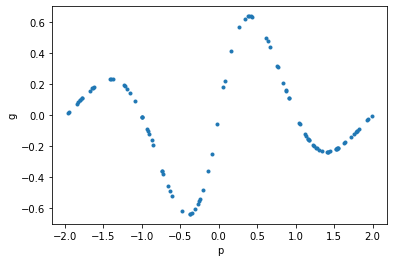

In [52]:
# Function Output Plot:
plt.figure('NN output v. g(p)')
plt.plot(p, t, '.', label='g(p)') 
plt.xlabel('p') 
plt.ylabel('g') 
#plt.show()

Now let's lay the output from the network on top. As we can see, the neural network with only a few neurons can approximate this function quite well.

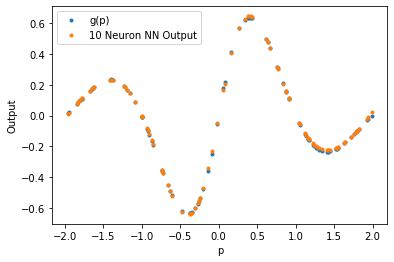

In [54]:
# Function Output Plot:
plt.figure('NN output v. g(p)')
plt.plot(p, t, '.', label='g(p)') 
plt.xlabel('p') 
plt.ylabel('g') 
#plt.show()

# NN Approximation Plot:
plt.plot(p, best_output, '.', label='%s Neuron NN Output' % S) 
plt.xlabel('p') 
plt.ylabel('Output')
plt.legend(loc='upper left')
plt.show()

Finally, notice how the learning rate decreases with respect to epochs:

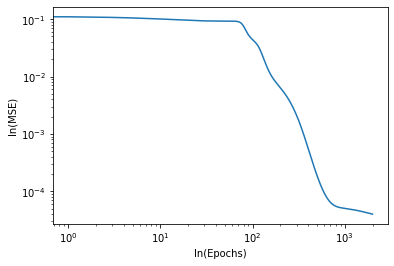

In [55]:
# MSE by Epoch Plot:
plt.figure('MSE by Epoch')
plt.loglog(list(range(epochs)), epochs_MSE) 
plt.xlabel('ln(Epochs)') 
plt.ylabel('ln(MSE)')
plt.show()